In [ ]:
#importing the library
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('all-data.csv',encoding='latin-1',names=['Sentiment','Text'])
#loading the dataset
data

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Text       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<Axes: >

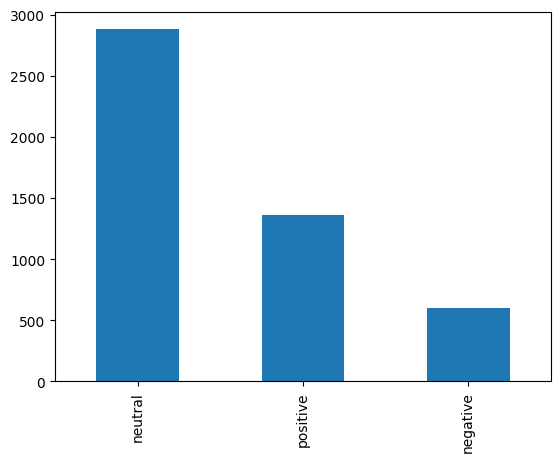

In [ ]:
data['Sentiment'].value_counts().plot(kind='bar')

<Axes: ylabel='Sentiment'>

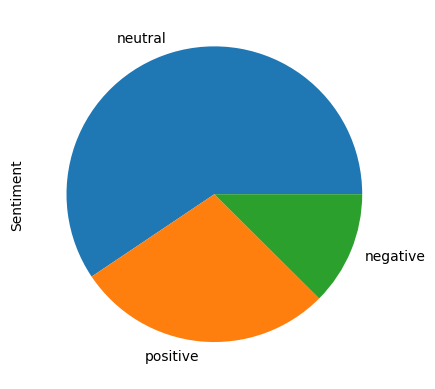

In [ ]:
data['Sentiment'].value_counts().plot(kind='pie')

In [ ]:
def get_sequences(text):
    #creating a tokenizer object
    tokenizer=Tokenizer()
    #using fit_on_text method to convert word into number most frequent would assign to 1 and with lower frequency assign to lower number
    tokenizer.fit_on_texts(text)
    #getting the word and the number assigning to them
    sequences=tokenizer.texts_to_sequences(text)


    #getting maximum length of list inthe sequences list

    print('Maximum Vocab',len(tokenizer.word_index))
    max_sequence_length=np.max(list(map(lambda x:len(x),sequences)))

    print('Max Sequences Length',max_sequence_length)

    sequences=pad_sequences(sequences,maxlen=max_sequence_length,padding='post')

    return sequences

In [ ]:
get_sequences(data['Text'])

Maximum Vocab 10122
Max Sequences Length 71


array([[  94,    5, 3498, ...,    0,    0,    0],
       [ 840,  336,    5, ...,    0,    0,    0],
       [   1,  293,  656, ...,    0,    0,    0],
       ...,
       [  42,   31,  242, ...,    0,    0,    0],
       [  30,   27,    2, ...,    0,    0,    0],
       [  27,    3,   35, ...,    0,    0,    0]], dtype=int32)

In [ ]:
def preprocess_inputs(data):
    data=data.copy()
    sequences=get_sequences(data['Text'])
    data['Sentiment']=data['Sentiment'].replace({'negative':0,'positive':1,'neutral':2})
    y=data['Sentiment']

    x_train,x_test,y_train,y_test=train_test_split(sequences,y,train_size=0.7,random_state=1)
    return x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test,y_train,y_test=preprocess_inputs(data)
x_train

Maximum Vocab 10122
Max Sequences Length 71


array([[5442,  510,   16, ...,    0,    0,    0],
       [  22, 1628,    4, ...,    0,    0,    0],
       [1141,  936,  136, ...,    0,    0,    0],
       ...,
       [   1,  419,   16, ...,    0,    0,    0],
       [2586,  123, 3247, ...,    0,    0,    0],
       [  30,  615,  555, ...,    0,    0,    0]], dtype=int32)

In [ ]:
x_train.shape

(3392, 71)

In [ ]:
y_train

545     1
2374    0
4217    2
1071    2
716     1
       ..
2895    2
2763    2
905     1
3980    2
235     1
Name: Sentiment, Length: 3392, dtype: int64

In [ ]:
inputs=tf.keras.Input(shape=(71,))
x=tf.keras.layers.Embedding(
input_dim=10123,
output_dim=128,
input_length=71)(inputs)
x=tf.keras.layers.GRU(256,activation='tanh')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.2,
                 batch_size=32,epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping(
                 monitor='val_loss',
                 patience=3,
                 restore_best_weights=True)])

Epoch 1/100
85/85 [==============================] - 26s 268ms/step - loss: 0.9258 - accuracy: 0.5986 - val_loss: 0.9693 - val_accuracy: 0.5700
Epoch 2/100
85/85 [==============================] - 23s 274ms/step - loss: 0.9159 - accuracy: 0.6052 - val_loss: 0.9594 - val_accuracy: 0.5700
Epoch 3/100
85/85 [==============================] - 25s 296ms/step - loss: 0.9163 - accuracy: 0.6052 - val_loss: 0.9643 - val_accuracy: 0.5700
Epoch 4/100
85/85 [==============================] - 21s 250ms/step - loss: 0.9164 - accuracy: 0.6052 - val_loss: 0.9650 - val_accuracy: 0.5700
Epoch 5/100
85/85 [==============================] - 22s 257ms/step - loss: 0.9154 - accuracy: 0.6052 - val_loss: 0.9595 - val_accuracy: 0.5700


In [ ]:
model.evaluate(x_test,y_test)

46/46 [==============================] - 4s 82ms/step - loss: 0.9366 - accuracy: 0.5846


[0.9366382956504822, 0.5845942497253418]

In [ ]:
x_test

array([[   1, 1967,  159, ...,    0,    0,    0],
       [ 554,   16, 6822, ...,    0,    0,    0],
       [  42,   31,  242, ...,    0,    0,    0],
       ...,
       [  94,    5, 2084, ...,    0,    0,    0],
       [   1,  259,  184, ...,    0,    0,    0],
       [ 618,   12,  538, ...,    0,    0,    0]], dtype=int32)

In [ ]:
model.predict(x_test)

46/46 [==============================] - 4s 68ms/step


array([[0.14159766, 0.26219493, 0.5962075 ],
       [0.14159766, 0.26219493, 0.5962075 ],
       [0.14159766, 0.26219493, 0.5962075 ],
       ...,
       [0.14159764, 0.2621949 , 0.59620744],
       [0.14159764, 0.26219493, 0.59620744],
       [0.14159764, 0.2621949 , 0.59620744]], dtype=float32)

In [ ]:
y_pred=np.argmax(model.predict(x_test),axis=1)

46/46 [==============================] - 3s 63ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

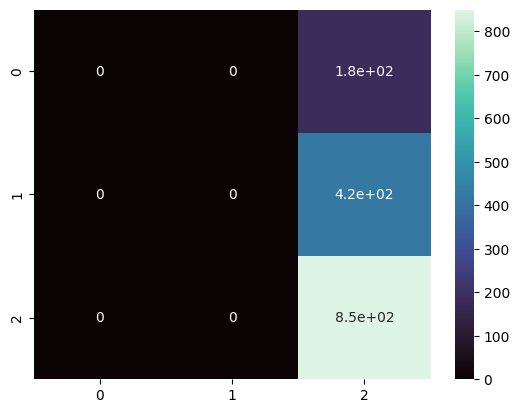

In [ ]:
cm=confusion_matrix(np.array(y_test),y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()